# Step 0: Import Libraries and Load Dataset

Before starting the analysis and model building, we first import all the required Python libraries and load the dataset.

## Importing Required Libraries
- **NumPy**: For numerical operations and handling arrays efficiently.  
- **Pandas**: For data loading, cleaning, and manipulation.  
- **Matplotlib**: For data visualization (to plot charts and graphs).  
- **collections.Counter**: To count occurrences of elements, which is useful for analyzing categorical features.  
- **random** and **math**: For generating reproducible random values and performing mathematical operations.

We also set a **random seed** to ensure that random processes (such as data splitting or shuffling) produce the same results every time the notebook is run.  
This improves **reproducibility**, meaning other people can run the same code and get identical outputs.

In [1]:
# Step 0: imports and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
import math

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Loading the Dataset
Next, we load the Mushroom Classification dataset from the Kaggle input directory. This dataset contains descriptions of mushroom species with various categorical features, and the goal is to classify whether each mushroom is edible or poisonous. After loading the dataset into a pandas DataFrame (`df`), we:
- Display the shape of the dataset (number of rows and columns).  
- Use `.head()` to preview the first few records.
- Use `.tail()` to preview the last five rows.

In [2]:
# load dataset (Kaggle path)
csv_path = '/kaggle/input/mushroom-classification/mushrooms.csv'
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
df.head() 

Dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


# Step 1: Exploratory Data Analysis (EDA)

In this step, we explore the target variable **`class`**, which indicates whether a mushroom is **edible (`e`)** or **poisonous (`p`)**. EDA helps us understand the data distribution, class balance, and potential biases before training any model.

## Checking Class Distribution
We start by counting how many samples belong to each class using `value_counts()` and then calculate their respective percentages to see the class balance.

In [4]:
# Step1: Exploratory Data Analysis 
print(df['class'].value_counts())

# Calculate percentages
print("\nPercentage distribution:")
print(df['class'].value_counts(normalize=True) * 100)

class
e    4208
p    3916
Name: count, dtype: int64

Percentage distribution:
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


## Visualizing Class Distribution
To get a clearer understanding of the dataset balance, we visualize the class counts using:
- A **bar chart** to show the total number of edible vs. poisonous mushrooms.
- A **pie chart** to represent the percentage distribution of both classes.

These visualizations help confirm whether the dataset is balanced or biased toward one category.

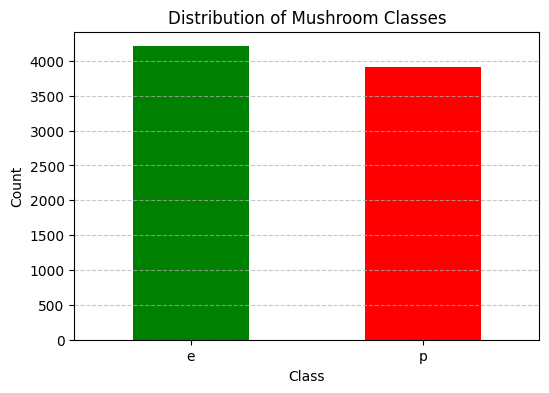

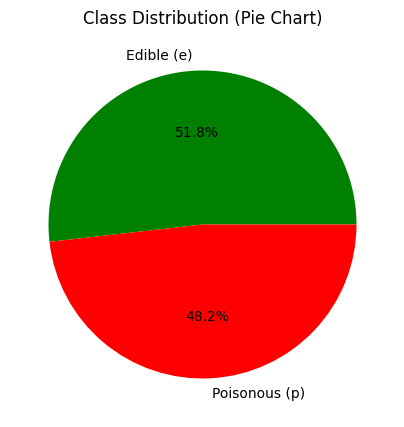

In [5]:
# Bar plot using Matplotlib
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Mushroom Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie chart
plt.figure(figsize=(5,5))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], labels=['Edible (e)', 'Poisonous (p)'])
plt.title('Class Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

# Step 2: Distribution of Categorical Features

Since the Mushroom Classification dataset consists entirely of **categorical features**, it is important to visualize how the values are distributed for each feature. This helps identify dominant categories, potential data imbalances, and the overall diversity of attribute values.

## Visualizing Feature Distributions
We use **Seaborn’s `countplot()`** to plot the frequency distribution of each categorical column in the dataset. Each subplot shows how often each category appears for a given feature.

## Explanation
- We create subplots for each categorical column in the dataset.
- Each subplot displays a bar chart showing the count of every unique category in that feature.
- The `palette='viridis'` color scheme makes the plots visually consistent.
- Rotating the x-axis labels improves readability.
- Finally, `plt.tight_layout()` ensures that the subplots do not overlap, producing a clean visualization grid.

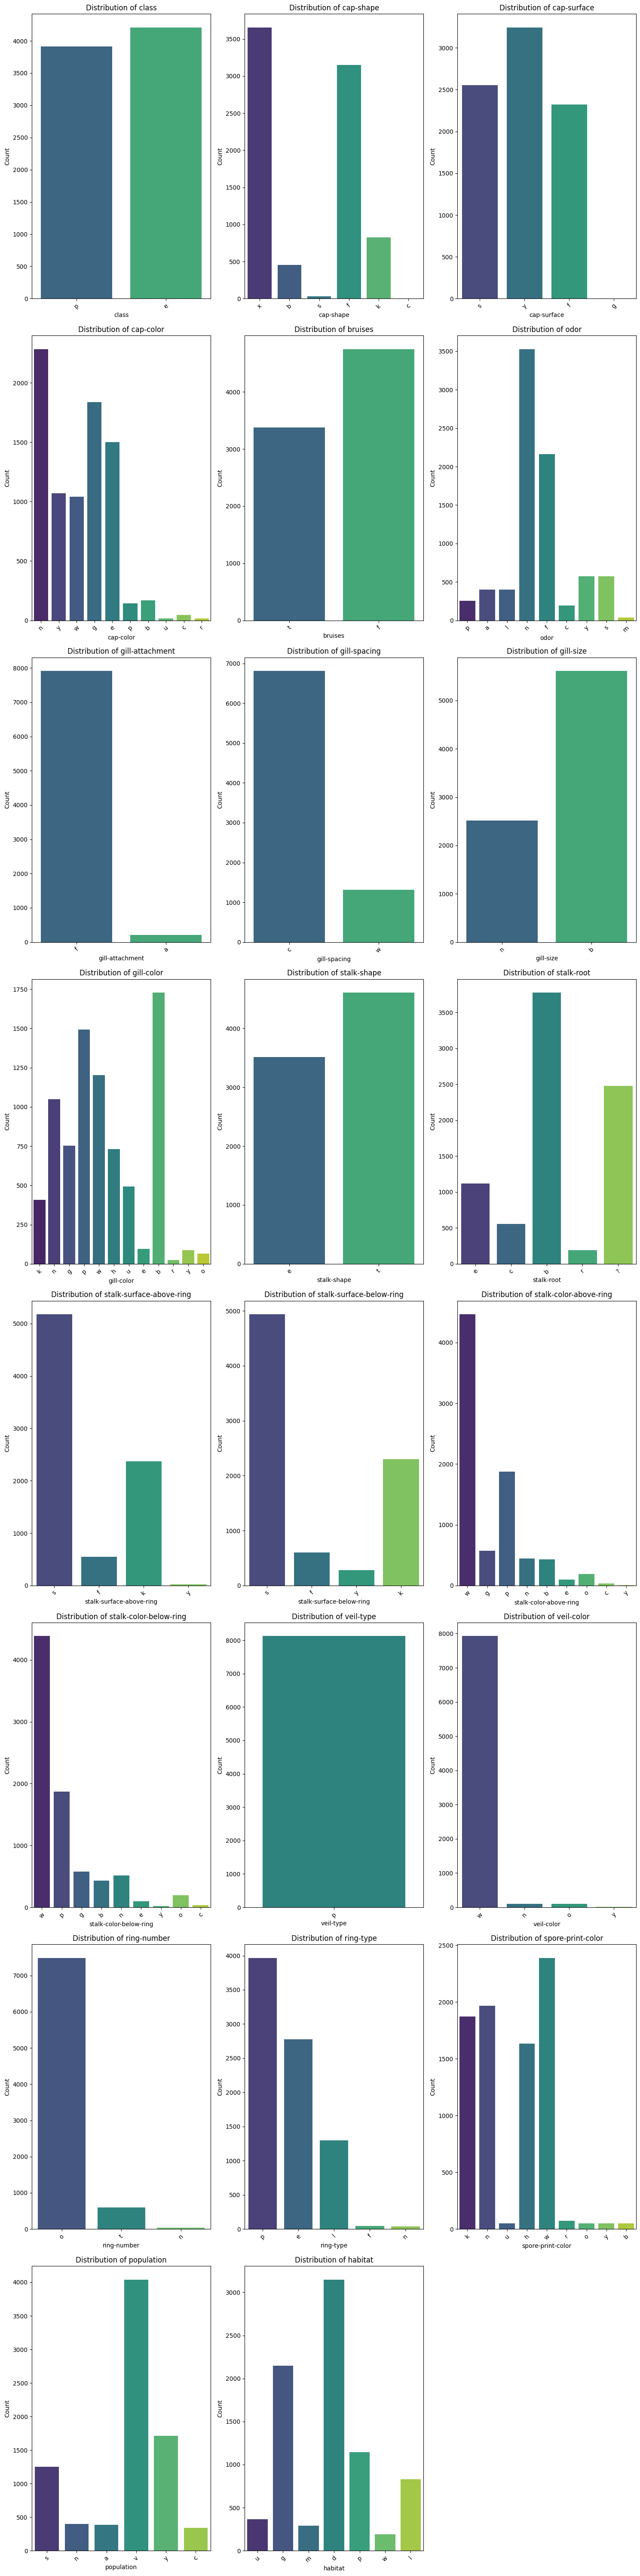

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of each categorical feature
categorical_cols = df.columns  # all are categorical in this dataset

plt.figure(figsize=(15, 60))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 3, i)  # adjust number of rows/columns based on features
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 3: Decoding and Visualizing Selected Categorical Features

The Mushroom dataset uses **single-letter codes** to represent feature categories. For example, in the column `cap-shape`, letters like `'b'`, `'x'`, and `'f'` represent `'bell'`, `'convex'`, and `'flat'` shapes respectively. To make the data more interpretable, we can **decode** these values into their corresponding descriptive names.

In this step, we demonstrate the decoding process on two features:  
- **`cap-shape`** → decoded into `cap-shape-decoded`  
- **`odor`** → decoded into `odor-decoded`


In [7]:
# Example: decode only 'cap-shape' and 'odor' for demonstration
cap_shape_map = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
odor_map = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty',
             'n': 'none', 'p': 'pungent', 's': 'spicy'}

df['cap-shape-decoded'] = df['cap-shape'].map(cap_shape_map)
df['odor-decoded'] = df['odor'].map(odor_map)

## Visualizing the Decoded Features

We visualize the decoded columns to understand their distribution. The bar plots show how frequently each category appears in the dataset for:
- **Cap Shape**  
- **Odor**

This helps in interpreting which types of mushroom shapes and odors are most common.

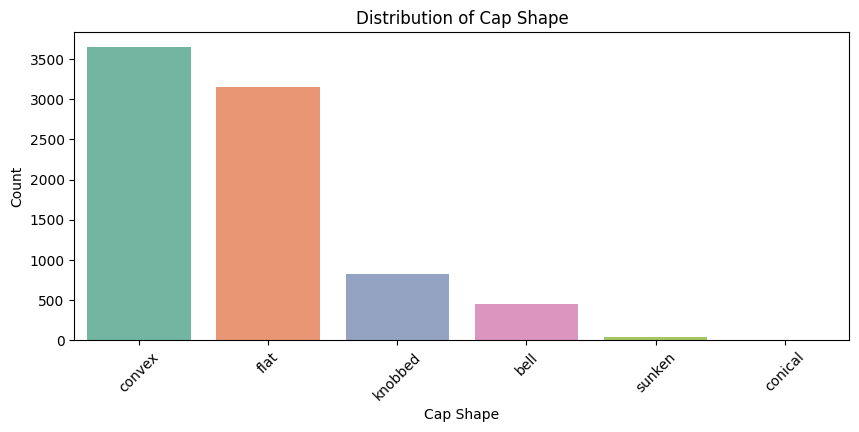

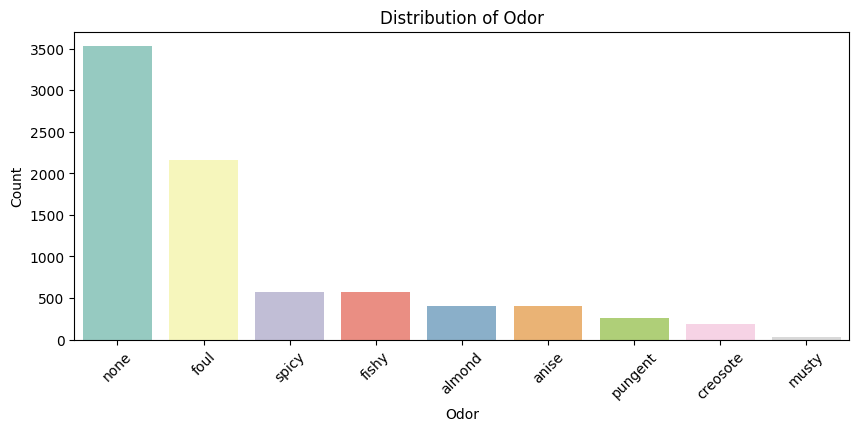

In [8]:
# Plot decoded example
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='cap-shape-decoded', order=df['cap-shape-decoded'].value_counts().index, palette='Set2')
plt.title("Distribution of Cap Shape")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='odor-decoded', order=df['odor-decoded'].value_counts().index, palette='Set3')
plt.title("Distribution of Odor")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Step 4: Preparing Features and Target Variable

Before training a machine learning model, we need to separate the dataset into **features (inputs)** and the **target (output)** variable.

## Defining the Target Variable
The dataset contains a column named `class` which represents whether a mushroom is:
- `'p'` → Poisonous  
- `'e'` → Edible  

We convert these categorical labels into numeric form for modeling:
- `1` → Poisonous  
- `0` → Edible

In [9]:
# The dataset has a column 'class' with 'p' (poisonous) and 'e' (edible).
df['target'] = df['class'].map({'p':1, 'e':0})

## Splitting Features and Target
We now separate the dataset into:
- **Features (`X_raw`)**: All columns except `class` and the newly created `target` column.  
- **Target (`y`)**: The `target` column representing the class label.

In [11]:
X_raw = df.drop(columns=['class', 'target'])
y = df['target']
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: target, Length: 8124, dtype: int64


## One-Hot Encoding of Categorical Features
Since all features in the dataset are **categorical**, we perform **one-hot encoding** to convert them into a numerical format suitable for machine learning algorithms. Each unique category in a feature becomes a new binary column (0 or 1), allowing the model to interpret categorical information mathematically.

In [12]:
# One-hot encode all categorical features (assignment requires one-hot)
X = pd.get_dummies(X_raw, prefix_sep='=')

print("After one-hot encoding, shape:", X.shape)
X.head()

After one-hot encoding, shape: (8124, 132)


,cap-shape=b,cap-shape=c,cap-shape=f,cap-shape=k,cap-shape=s,cap-shape=x,cap-surface=f,cap-surface=g,cap-surface=s,cap-surface=y,...,cap-shape-decoded=sunken,odor-decoded=almond,odor-decoded=anise,odor-decoded=creosote,odor-decoded=fishy,odor-decoded=foul,odor-decoded=musty,odor-decoded=none,odor-decoded=pungent,odor-decoded=spicy
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


# Step 5: Splitting the Dataset into Training and Testing Sets

To evaluate model performance fairly, we divide the dataset into two parts:
- **Training Set (80%)** → Used to train the model.
- **Testing Set (20%)** → Used to test how well the model generalizes to unseen data.

This split ensures that the model does not simply memorize the training examples but learns patterns that can be applied to new samples.

## Explanation
1. We calculate the total number of samples `n` and then create a **random permutation** of indices to ensure randomness in the split.
2. Using an 80/20 ratio, we divide these indices into training and testing sets.
3. The corresponding rows from both `X` (features) and `y` (target) are selected using these index lists.
4. `reset_index(drop=True)` removes the old index values to keep data alignment consistent.
5. Finally, we display the shape of the training and testing datasets to confirm the split sizes.

In [13]:
# Step : train/test split (80/20)
n = len(X)
perm = np.random.permutation(n)
train_size = int(0.8 * n)
train_idx = perm[:train_size]
test_idx = perm[train_size:]

X_train = X.iloc[train_idx].reset_index(drop=True)
y_train = y.iloc[train_idx].reset_index(drop=True)
X_test = X.iloc[test_idx].reset_index(drop=True)
y_test = y.iloc[test_idx].reset_index(drop=True)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (6499, 132) Test shape: (1625, 132)


# Step 6: Entropy and Information Gain Calculation

In Decision Tree algorithms, Entropy and Information Gain are two fundamental concepts used to determine the best feature to split the dataset.

## **Information Gain**
Entropy measures the impurity or disorder in a dataset.

- If all samples belong to the same class (pure node), entropy = 0.  
- If samples are evenly distributed among classes (completely impure), entropy is at its maximum (1.0 for binary classification).

It is calculated using a logarithmic formula involving the probabilities of each class.  

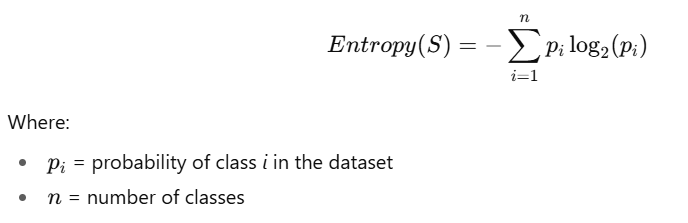

## **Information Gain**
Information Gain measures the reduction in entropy after splitting the dataset on a feature.

It is the difference between:
- The entropy of the parent node (before splitting), and  
- The weighted average of the entropy of the child nodes (after splitting).

A higher Information Gain means the feature provides a more effective split.  

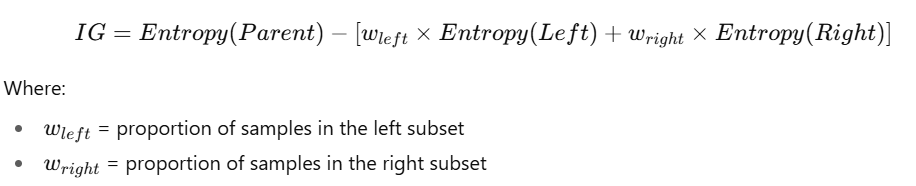

---

In [14]:
def entropy(y_array):
    # y_array can be numpy array or pandas Series containing 0/1 labels
    y = np.asarray(y_array)
    if len(y) == 0:
        return 0.0
    counts = np.bincount(y)
    probs = counts / counts.sum()
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

def information_gain(parent_y, left_y, right_y):
    parent_y = np.asarray(parent_y)
    left_y = np.asarray(left_y)
    right_y = np.asarray(right_y)
    if len(parent_y) == 0:
        return 0.0
    w_left = len(left_y) / len(parent_y)
    w_right = len(right_y) / len(parent_y)
    return entropy(parent_y) - (w_left * entropy(left_y) + w_right * entropy(right_y))

# quick test
print("Entropy of equal class [0,1]:", entropy([0,1]))
print("Entropy of pure [1,1,1]:", entropy([1,1,1]))


Entropy of equal class [0,1]: 1.0
Entropy of pure [1,1,1]: -0.0


# Step 7: Implementing a Decision Tree Classifier from Scratch

In this step, we manually implement a **Decision Tree Classifier** using only NumPy and pandas — without relying on scikit-learn. Our tree uses **Entropy** and **Information Gain** as the criteria for selecting the best feature to split the dataset.


## **Decision Node Structure**

Each node in the Decision Tree is represented by a simple class that holds:
- The feature name used for splitting (for example, "odor=y").
- The left and right child nodes.
- Whether the node is a leaf node.
- The predicted class label if it’s a leaf.
- The depth of the node in the tree.

In [15]:
class DecisionNode:
    def __init__(self, *, feature=None, left=None, right=None, is_leaf=False, prediction=None, depth=0):
        self.feature = feature      # feature name (e.g., "odor=y")
        self.left = left            # branch when feature == 1
        self.right = right          # branch when feature == 0
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.depth = depth

# Step 8: Custom Decision Tree Classifier Implementation

In this section, we define a **Decision Tree Classifier** built completely from scratch.  
This model uses **entropy** and **information gain** to determine the best feature splits and recursively builds a binary tree to classify samples.  
It is designed to work with **one-hot encoded binary features (0/1)**.


## Overview

The class **DecisionTreeClassifierFromScratch** is a simple implementation of the Decision Tree algorithm.  
It recursively partitions the dataset by selecting the feature that provides the **highest information gain** at each node until one of the stopping conditions is met.

## **Purpose of Each Function in DecisionTreeClassifierFromScratch**

This section explains the purpose of every function defined inside the **DecisionTreeClassifierFromScratch** class. Each method contributes to building, training, and using a custom Decision Tree model from scratch.

---

### **1. `__init__()`**

**Purpose:**  
Initializes the Decision Tree classifier with hyperparameters that control how the tree grows.

**Details:**  
- Sets the **maximum depth** of the tree (`max_depth`) to prevent overfitting.  
- Defines the **minimum number of samples** required to perform a split (`min_samples_split`).  
- Determines how many **features** should be considered at each split (`n_features`).  
- Allows an optional **random seed (`random_state`)** for reproducibility.  
- Initializes `root` as `None`, which will later hold the root node of the trained tree.

---

### **2. `fit()`**

**Purpose:**  
Trains (fits) the decision tree model on the given dataset.

**Details:**  
- Extracts all feature names from the input data.  
- If `n_features` is not specified, it uses all available features.  
- Combines the input features (`X_df`) and target labels (`y_series`) into one DataFrame for easier processing.  
- Calls the internal `_build_tree()` function to start constructing the tree from the root node recursively.

---

### **3. `_best_split()`**

**Purpose:**  
Finds the best feature to split the current dataset based on **information gain**.

**Details:**  
- Optionally selects a random subset of features (if `n_features` < total features).  
- Iterates over each selected feature and splits the data into two groups:  
  - **Left subset:** where the feature value = 1  
  - **Right subset:** where the feature value = 0  
- Skips any split that results in empty subsets.  
- Calculates **information gain** for each possible feature split.  
- Identifies and returns the feature with the highest gain, along with the corresponding left and right subsets.

**Returns:**  
- Best feature for splitting  
- Left subset of data  
- Right subset of data  
- Best information gain value

---

### **4. `_build_tree()`**

**Purpose:**  
Recursively builds the decision tree by splitting data until stopping conditions are met.

**Details:**  
- Calculates the **majority class label** (most common value in the current subset).  
- Checks **stopping conditions** to decide when to stop growing the tree:
  - All target values are the same (pure node).  
  - The maximum depth (`max_depth`) has been reached.  
  - The number of samples is smaller than `min_samples_split`.  
- If no stopping condition is met:
  - Calls `_best_split()` to find the best feature for splitting.
  - Recursively builds **left** and **right** subtrees.  
- Returns a `DecisionNode` object representing either:
  - A **leaf node** (if stopping condition met), or  
  - A **split node** (if further branching is possible).

---

### **5. `predict_one()`**

**Purpose:**  
Predicts the class label for a single input record.

**Details:**  
- Starts from the **root node** of the trained tree.  
- At each node:
  - Checks the value of the feature used for splitting.  
  - If the feature value = 1, moves to the **left** child node.  
  - If the feature value = 0, moves to the **right** child node.  
- Continues traversal until a **leaf node** is reached.  
- Returns the **predicted label** stored at that leaf.

**Note:**  
If a feature is missing in the input record, it is treated as having a value of 0.

---

### **6. `predict()`**

**Purpose:**  
Predicts class labels for all samples in the dataset.

**Details:**  
- Iterates through every row of the input DataFrame.  
- For each row, calls the `predict_one()` function to obtain a single prediction.  
- Collects all predictions and returns them as a NumPy array.

---

### **Summary of Function Roles**

| Function | Role |
|-----------|------|
| `__init__()` | Initializes tree parameters and configuration. |
| `fit()` | Trains the tree on the dataset. |
| `_best_split()` | Finds the feature that gives the highest information gain. |
| `_build_tree()` | Recursively constructs the decision tree structure. |
| `predict_one()` | Makes prediction for one data sample by traversing the tree. |
| `predict()` | Predicts labels for an entire dataset. |

---

In [16]:
class DecisionTreeClassifierFromScratch:
    def __init__(self, max_depth=10, min_samples_split=2, n_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features  # number of features to consider at each split (None => all)
        self.root = None
        self.random_state = random_state

    def fit(self, X_df, y_series):
        self.features = list(X_df.columns)
        if self.n_features is None:
            self.n_features = len(self.features)
        # combine for ease
        data = X_df.copy()
        data['target'] = y_series.values
        self.root = self._build_tree(data, depth=0)

    def _best_split(self, data):
        # choose features to consider for this split (random subset)
        features = self.features.copy()
        if self.n_features < len(self.features):
            features = random.sample(features, self.n_features)
        best_gain = 0.0
        best_feature = None
        best_left = None
        best_right = None
        parent_y = data['target'].values
        for feat in features:
            # binary feature split: feat==1 vs feat==0
            left = data[data[feat] == 1]
            right = data[data[feat] == 0]
            if len(left) == 0 or len(right) == 0:
                continue
            gain = information_gain(parent_y, left['target'].values, right['target'].values)
            if gain > best_gain:
                best_gain = gain
                best_feature = feat
                best_left = left
                best_right = right
        return best_feature, best_left, best_right, best_gain

    def _build_tree(self, data, depth):
        y = data['target']
        num_samples = len(y)
        num_pos = int(y.sum())
        majority_label = 1 if num_pos >= (num_samples - num_pos) else 0

        # Stopping conditions
        if len(set(y)) == 1 or depth >= self.max_depth or num_samples < self.min_samples_split:
            return DecisionNode(is_leaf=True, prediction=majority_label, depth=depth)

        feat, left, right, gain = self._best_split(data)
        if feat is None or gain <= 0:
            return DecisionNode(is_leaf=True, prediction=majority_label, depth=depth)

        # recursively build
        left_node = self._build_tree(left.reset_index(drop=True), depth + 1)
        right_node = self._build_tree(right.reset_index(drop=True), depth + 1)
        return DecisionNode(feature=feat, left=left_node, right=right_node, is_leaf=False, depth=depth)

    def predict_one(self, x_row):
        node = self.root
        while not node.is_leaf:
            # safe access; treat missing as 0
            val = x_row.get(node.feature, 0)
            if val == 1:
                node = node.left
            else:
                node = node.right
        return node.prediction

    def predict(self, X_df):
        preds = [self.predict_one(row) for _, row in X_df.iterrows()]
        return np.array(preds)


In [20]:
!pip install graphviz

# Step 9: Decision Tree Visualization

This section provides a detailed explanation of the `visualize_tree()` function, which is used to visualize a trained Decision Tree model (specifically one built using the `DecisionTreeClassifierFromScratch` class). The visualization is created using the **Graphviz** library and displays the structure of the tree, including features, splits, and leaf predictions.

## **Purpose**:

This function generates a graphical representation of the trained decision tree.
It helps in understanding how the decision tree splits the data based on different features and what predictions are made at the leaf nodes.


In [17]:
from graphviz import Digraph

def visualize_tree(tree, title="Decision Tree Visualization"):
    """
    Visualize a DecisionTreeClassifierFromScratch object using graphviz.
    Adds a title at the top of the graph.
    """
    dot = Digraph(comment=title)
    dot.attr(label=title, labelloc="t", fontsize="20")  # title at top

    def add_nodes(node, parent=None, edge_label=""):
        node_id = str(id(node))
        if node.is_leaf:
            label = f"Leaf\nPrediction: {node.prediction}"
            dot.node(node_id, label=label, shape='box', style='filled', color='lightblue')
        else:
            label = f"Feature: {node.feature}"
            dot.node(node_id, label=label, shape='ellipse', color='lightgreen')
        
        if parent is not None:
            dot.edge(parent, node_id, label=edge_label)
        
        if not node.is_leaf:
            add_nodes(node.left, parent=node_id, edge_label="=1")
            add_nodes(node.right, parent=node_id, edge_label="=0")

    add_nodes(tree.root)
    return dot

# Step 10: Train and Visualize the Decision Tree Model

In this step, we train our **custom Decision Tree Classifier (built from scratch)** on the mushroom dataset and then visualize the trained tree structure using **Graphviz**.

## Purpose

This step helps to see how the decision tree splits features to classify mushrooms as edible or poisonous. The visualization provides an intuitive understanding of the learned decision rules.

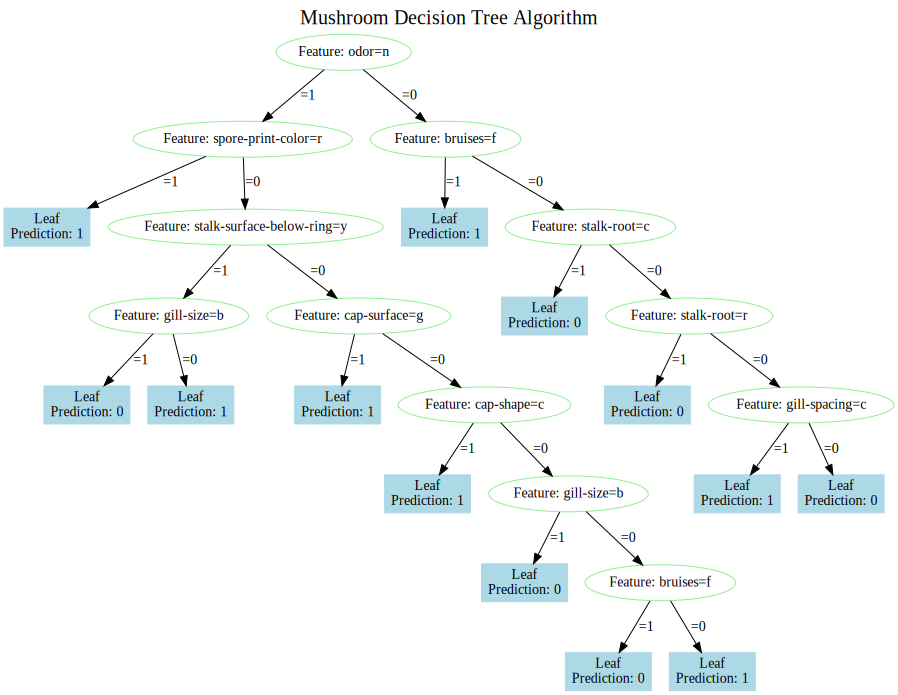

In [19]:
# Step: Train the decision tree model
tree = DecisionTreeClassifierFromScratch(max_depth=12, min_samples_split=2, n_features=None, random_state=RANDOM_SEED)
tree.fit(X_train, y_train)

dot = visualize_tree(tree, title="Mushroom Decision Tree Algorithm")
dot.render("decision_tree_graph", format="png", cleanup=True)
dot

In [21]:
preds_tree = tree.predict(X_test)
acc_tree = (preds_tree == y_test.values).mean()
print(f"Decision Tree accuracy on test set: {acc_tree*100:.2f}%")

Decision Tree accuracy on test set: 100.00%


## Step 11: Random Forest from Scratch
 
Implements a Random Forest classifier built entirely from scratch. The model combines multiple decision trees to improve accuracy and reduce overfitting through bootstrap sampling and feature randomness.

### **Key Parameters:**

- `n_estimators`: Number of decision trees to build in the forest.  
- `max_depth`: Maximum depth allowed for each decision tree.  
- `min_samples_split`: Minimum number of samples required to split a node in each tree.  
- `max_features`: Number of features to consider when looking for the best split (defaults to √n_features if not specified).  
- `sample_size`: Number of samples used for bootstrapping each tree (if `None`, uses all available samples).  
- `random_state`: Controls reproducibility by setting the random seed.


### **Main Methods:**

#### **1. fit(X_df, y_series):**
Trains the random forest model on the provided dataset.

**Process Overview:**
- Determines sample size for bootstrapping (`sample_size`).  
- Sets `max_features` to the square root of the total features if not provided (a common heuristic).  
- For each tree:
  - Randomly samples data points **with replacement** (bootstrap sampling).  
  - Initializes a new `DecisionTreeClassifierFromScratch` with the given parameters.  
  - Trains each decision tree independently on its bootstrap sample.  
  - Stores the trained tree in the `trees` list.


#### **2. predict(X_df):**
Generates predictions for the given dataset using the ensemble of trained trees.

**Process Overview:**
- Collects predictions from all trained trees (`all_preds`).  
- For each sample (column in prediction matrix):
  - Counts votes from all trees using majority voting.  
  - The class label with the most votes becomes the final prediction for that sample.  
- Returns the final array of predicted labels.

In [22]:
# Step 11: Random Forest from scratch
class RandomForestClassifierFromScratch:
    def __init__(self, n_estimators=10, max_depth=10, min_samples_split=2, max_features=None, sample_size=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features  # features to consider at each split (m)
        self.sample_size = sample_size    # sample size (int) for bootstrap (default = n_samples)
        self.random_state = random_state
        self.trees = []

    def fit(self, X_df, y_series):
        n_samples = len(X_df)
        if self.sample_size is None:
            sample_size = n_samples
        else:
            sample_size = int(self.sample_size)

        # default max_features: sqrt(number of features) (common RF heuristic)
        if self.max_features is None:
            self.max_features = max(1, int(math.sqrt(X_df.shape[1])))

        self.trees = []
        for i in range(self.n_estimators):
            idx = np.random.choice(n_samples, size=sample_size, replace=True)
            X_sample = X_df.iloc[idx].reset_index(drop=True)
            y_sample = y_series.iloc[idx].reset_index(drop=True)
            tree = DecisionTreeClassifierFromScratch(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                n_features=self.max_features,
                random_state=(None if self.random_state is None else self.random_state + i)
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X_df):
        # gather predictions from all trees (n_trees, n_samples)
        all_preds = np.vstack([tree.predict(X_df) for tree in self.trees])
        # majority vote per sample
        majority_preds = []
        for col in range(all_preds.shape[1]):
            votes = all_preds[:, col]
            vote_counts = Counter(votes)
            majority_label = vote_counts.most_common(1)[0][0]
            majority_preds.append(majority_label)
        return np.array(majority_preds)

# Step 12: Train a Random Forest
  
Trains a Random Forest model (implemented from scratch) using the training dataset and evaluates its accuracy on the test dataset.

In [23]:
# Step 7: train a random forest
rf = RandomForestClassifierFromScratch(
    n_estimators=30,
    max_depth=12,
    min_samples_split=2,
    max_features=None,   # will default to sqrt(n_features)
    sample_size=None,    # bootstrap size = n_samples
    random_state=RANDOM_SEED
)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)
acc_rf = (preds_rf == y_test.values).mean()
print(f"Random Forest accuracy on test set: {acc_rf*100:.2f}%")

Random Forest accuracy on test set: 100.00%


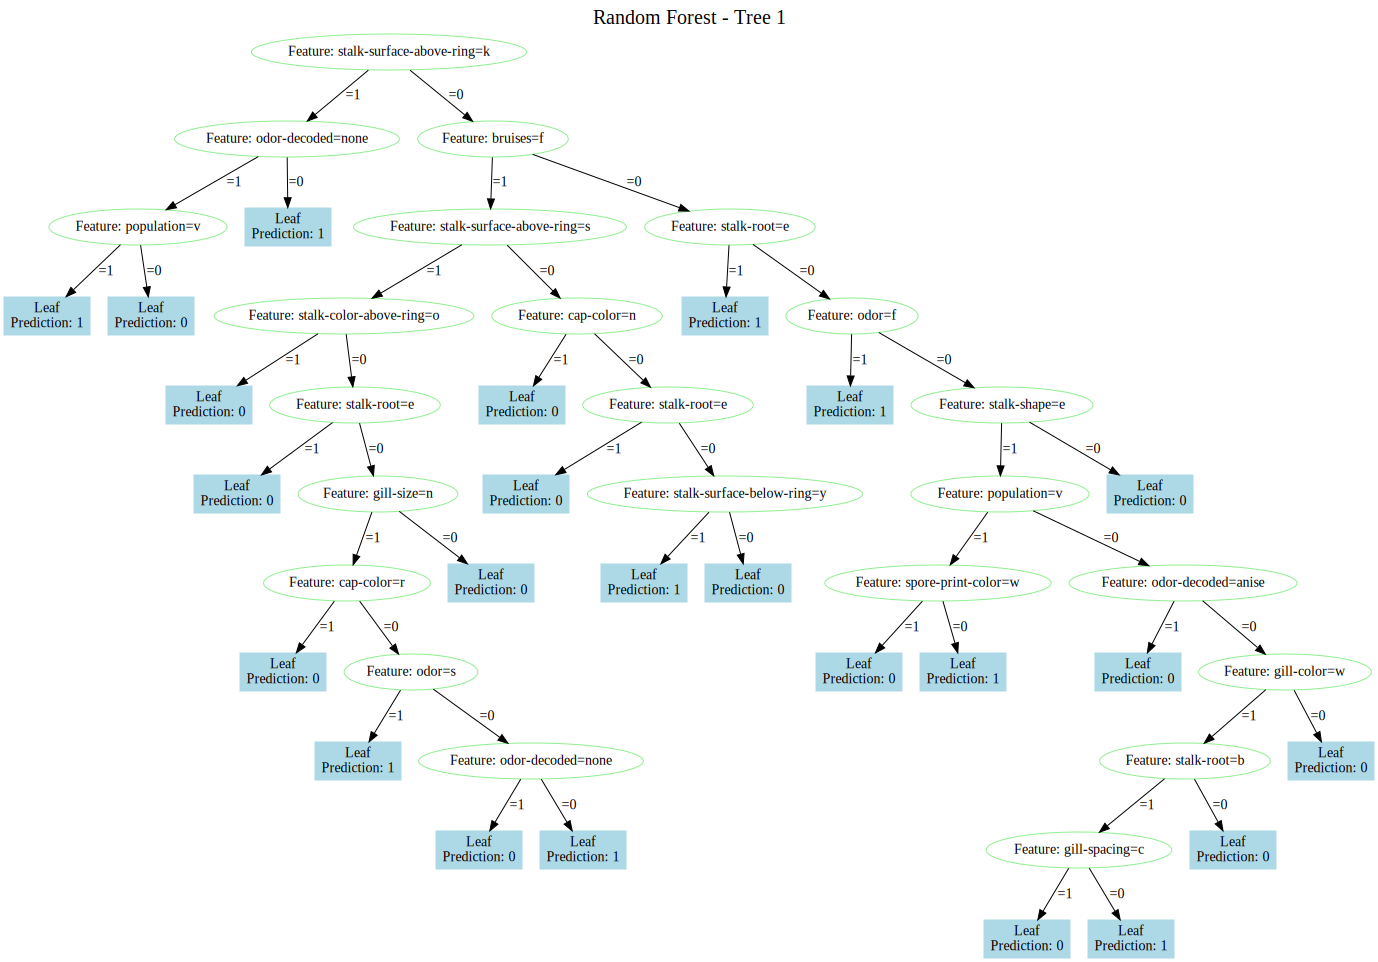

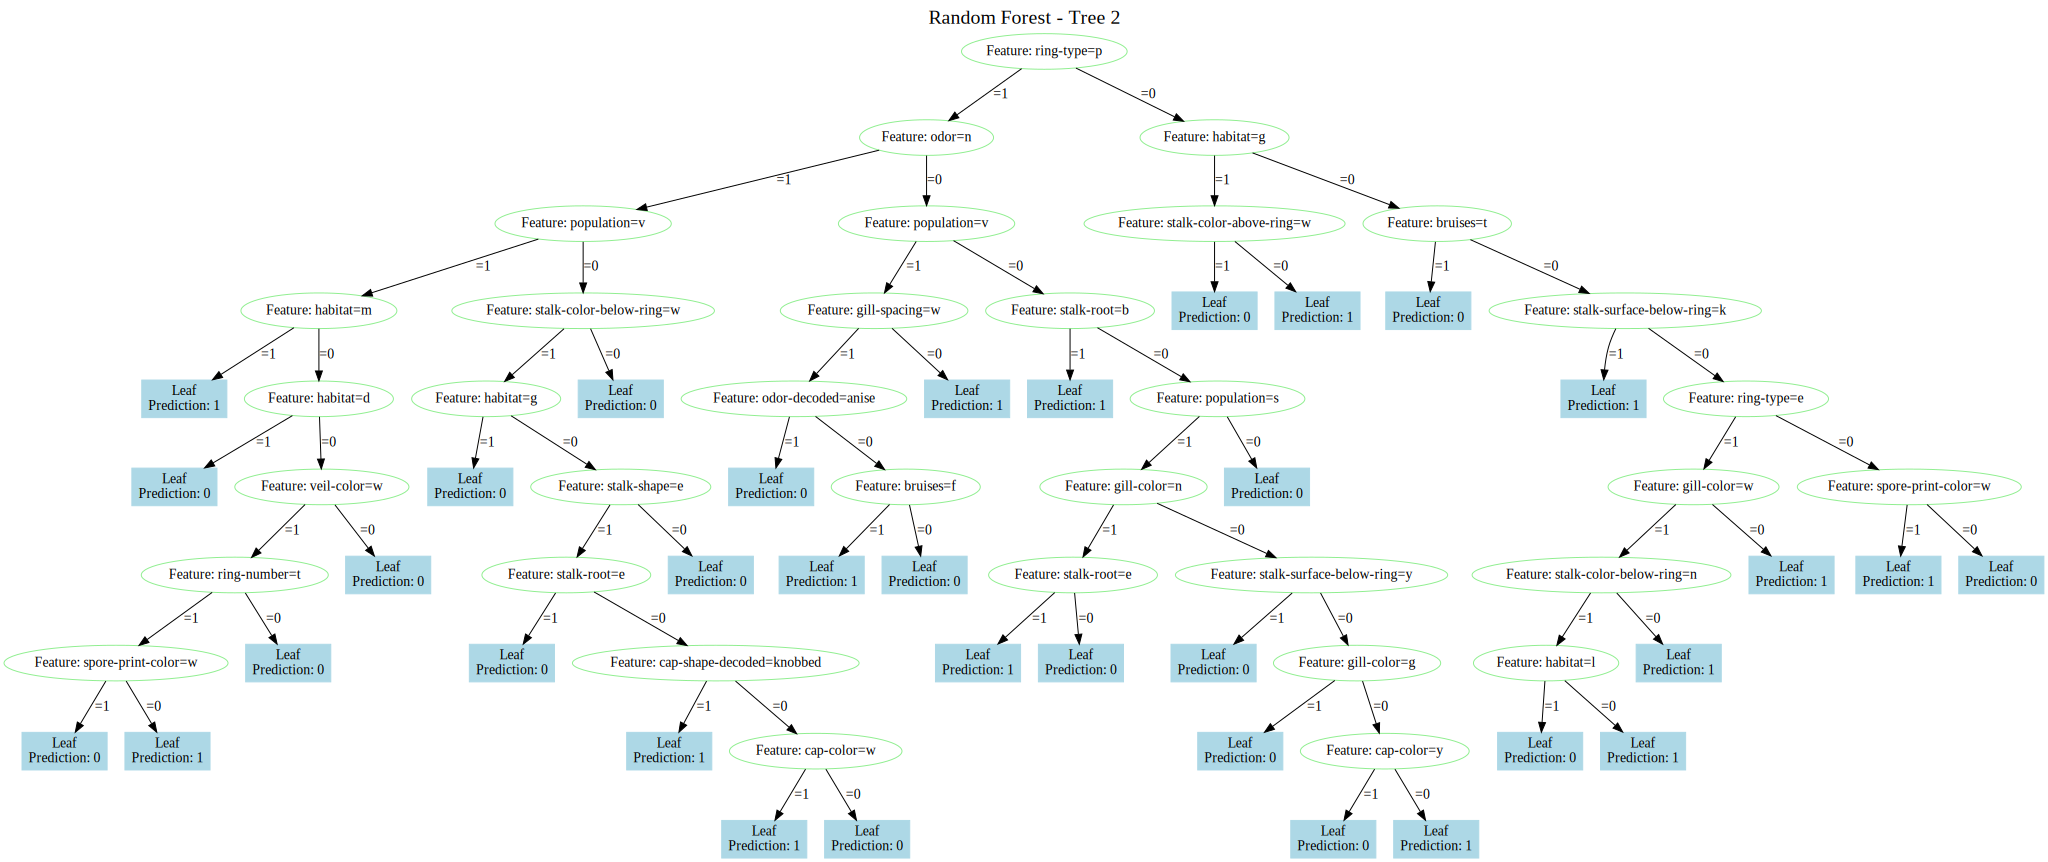

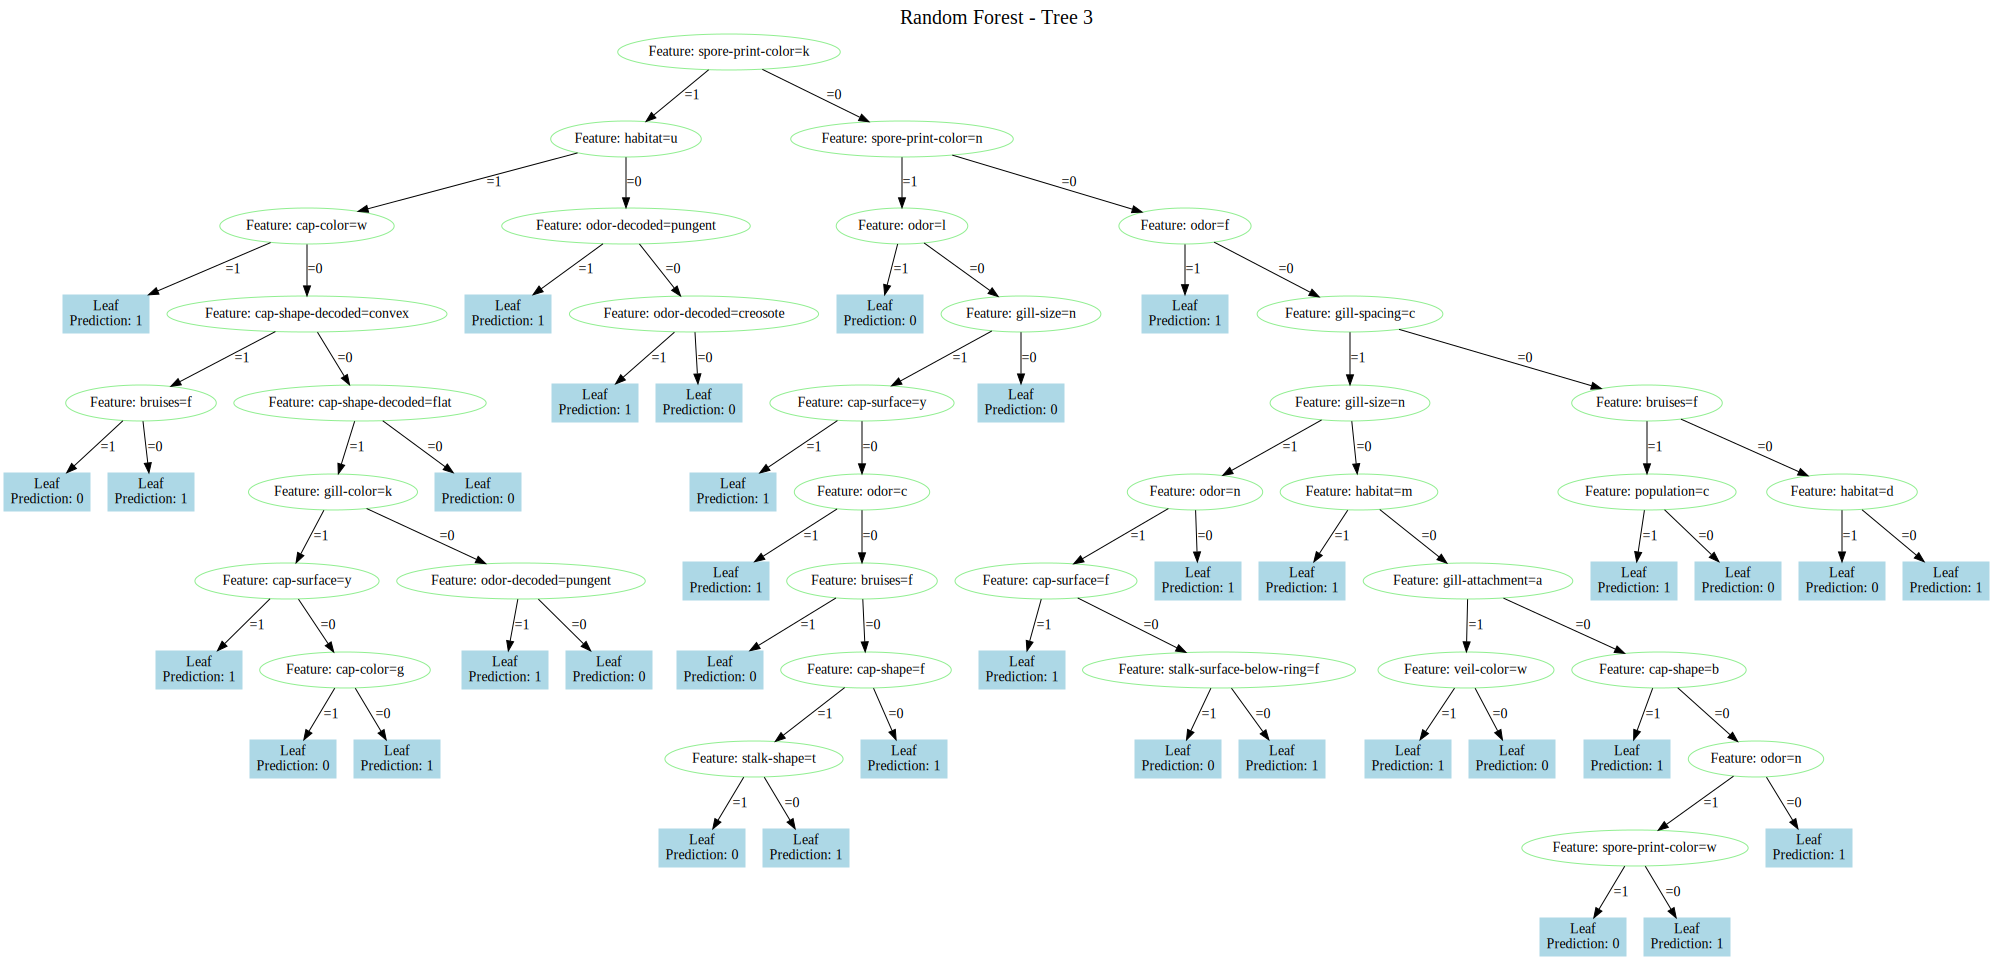

In [26]:
# visualize_tree() must be the same function you used earlier for DecisionTreeClassifierFromScratch

# Example: visualize the first 3 trees from your trained Random Forest
for i, tree_model in enumerate(rf.trees[:3]):  # change number as needed
    dot = visualize_tree(tree_model, title=f"Random Forest - Tree {i+1}")
    output_filename = f"random_forest_tree_{i+1}"
    dot.render(output_filename, format="png", cleanup=True)
    display(dot)


# Step 8: Model Evaluation using Confusion Matrix and Performance Metrics
 
To evaluate the performance of the trained **Random Forest** model using the **Confusion Matrix**, and compute key performance metrics such as **Precision**, **Recall**, and **F1-Score**.


### **1. Construct the Confusion Matrix**

The confusion matrix summarizes the model’s predictions by comparing the actual class labels (`y_true`) with the predicted labels (`preds_rf`).

Where:  
- **TP (True Positive):** Model correctly predicts positive class.  
- **TN (True Negative):** Model correctly predicts negative class.  
- **FP (False Positive):** Model incorrectly predicts positive class when it is actually negative.  
- **FN (False Negative):** Model incorrectly predicts negative class when it is actually positive.

### **2. Compute Key Evaluation Metrics**

These metrics provide deeper insights into the model’s prediction quality:


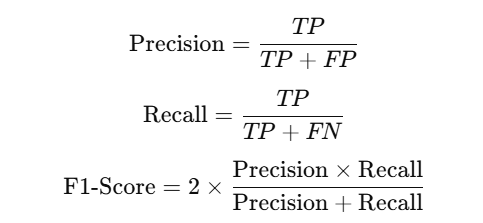

In [24]:
# Confusion matrix (manual)
y_true = y_test.values
tp = np.sum((y_true == 1) & (preds_rf == 1))
tn = np.sum((y_true == 0) & (preds_rf == 0))
fp = np.sum((y_true == 0) & (preds_rf == 1))
fn = np.sum((y_true == 1) & (preds_rf == 0))
cm = np.array([[tn, fp],
               [fn, tp]])

# Basic metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

Precision: 1.0000, Recall: 1.0000, F1: 1.0000


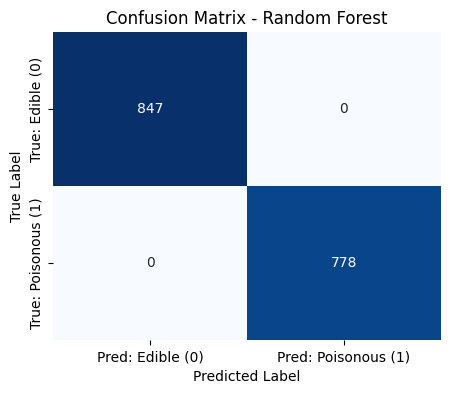

In [25]:
# === Colored Confusion Matrix (Heatmap) ===
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: Edible (0)', 'Pred: Poisonous (1)'],
            yticklabels=['True: Edible (0)', 'True: Poisonous (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()